# Explore here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


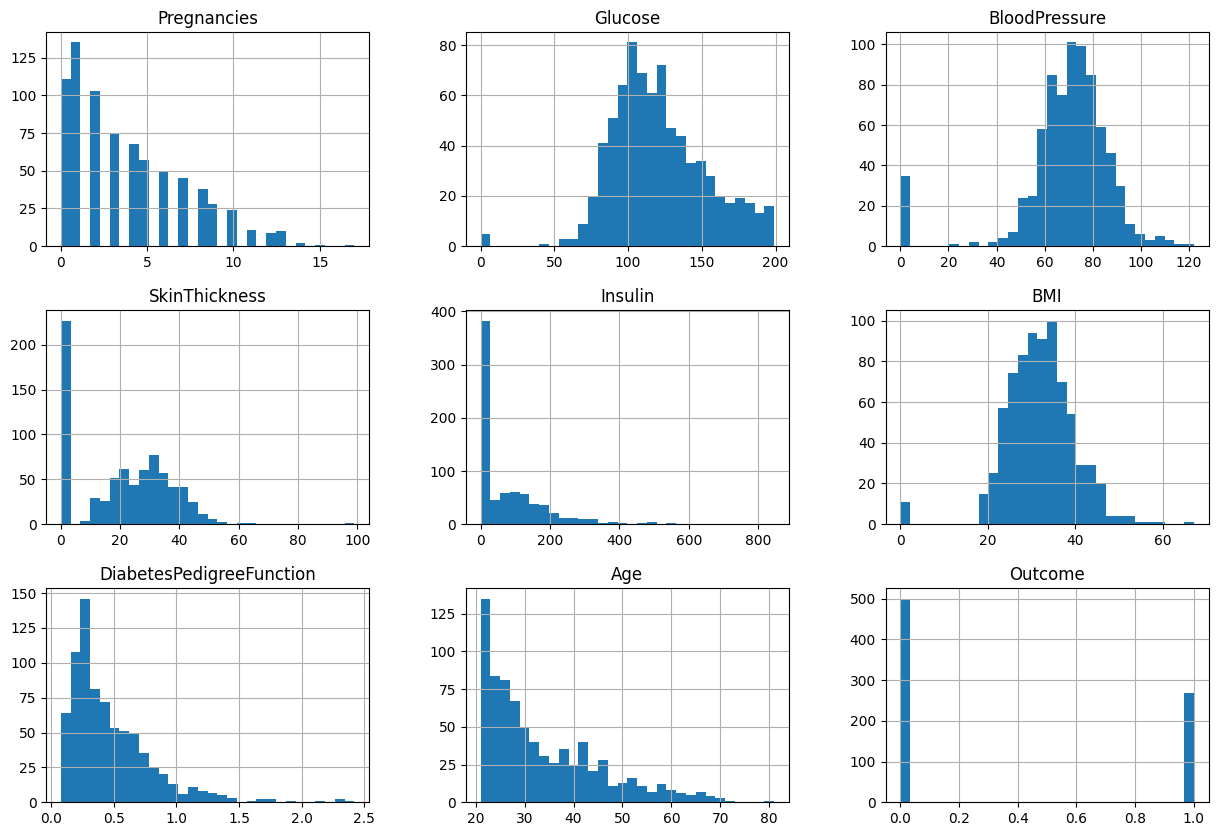

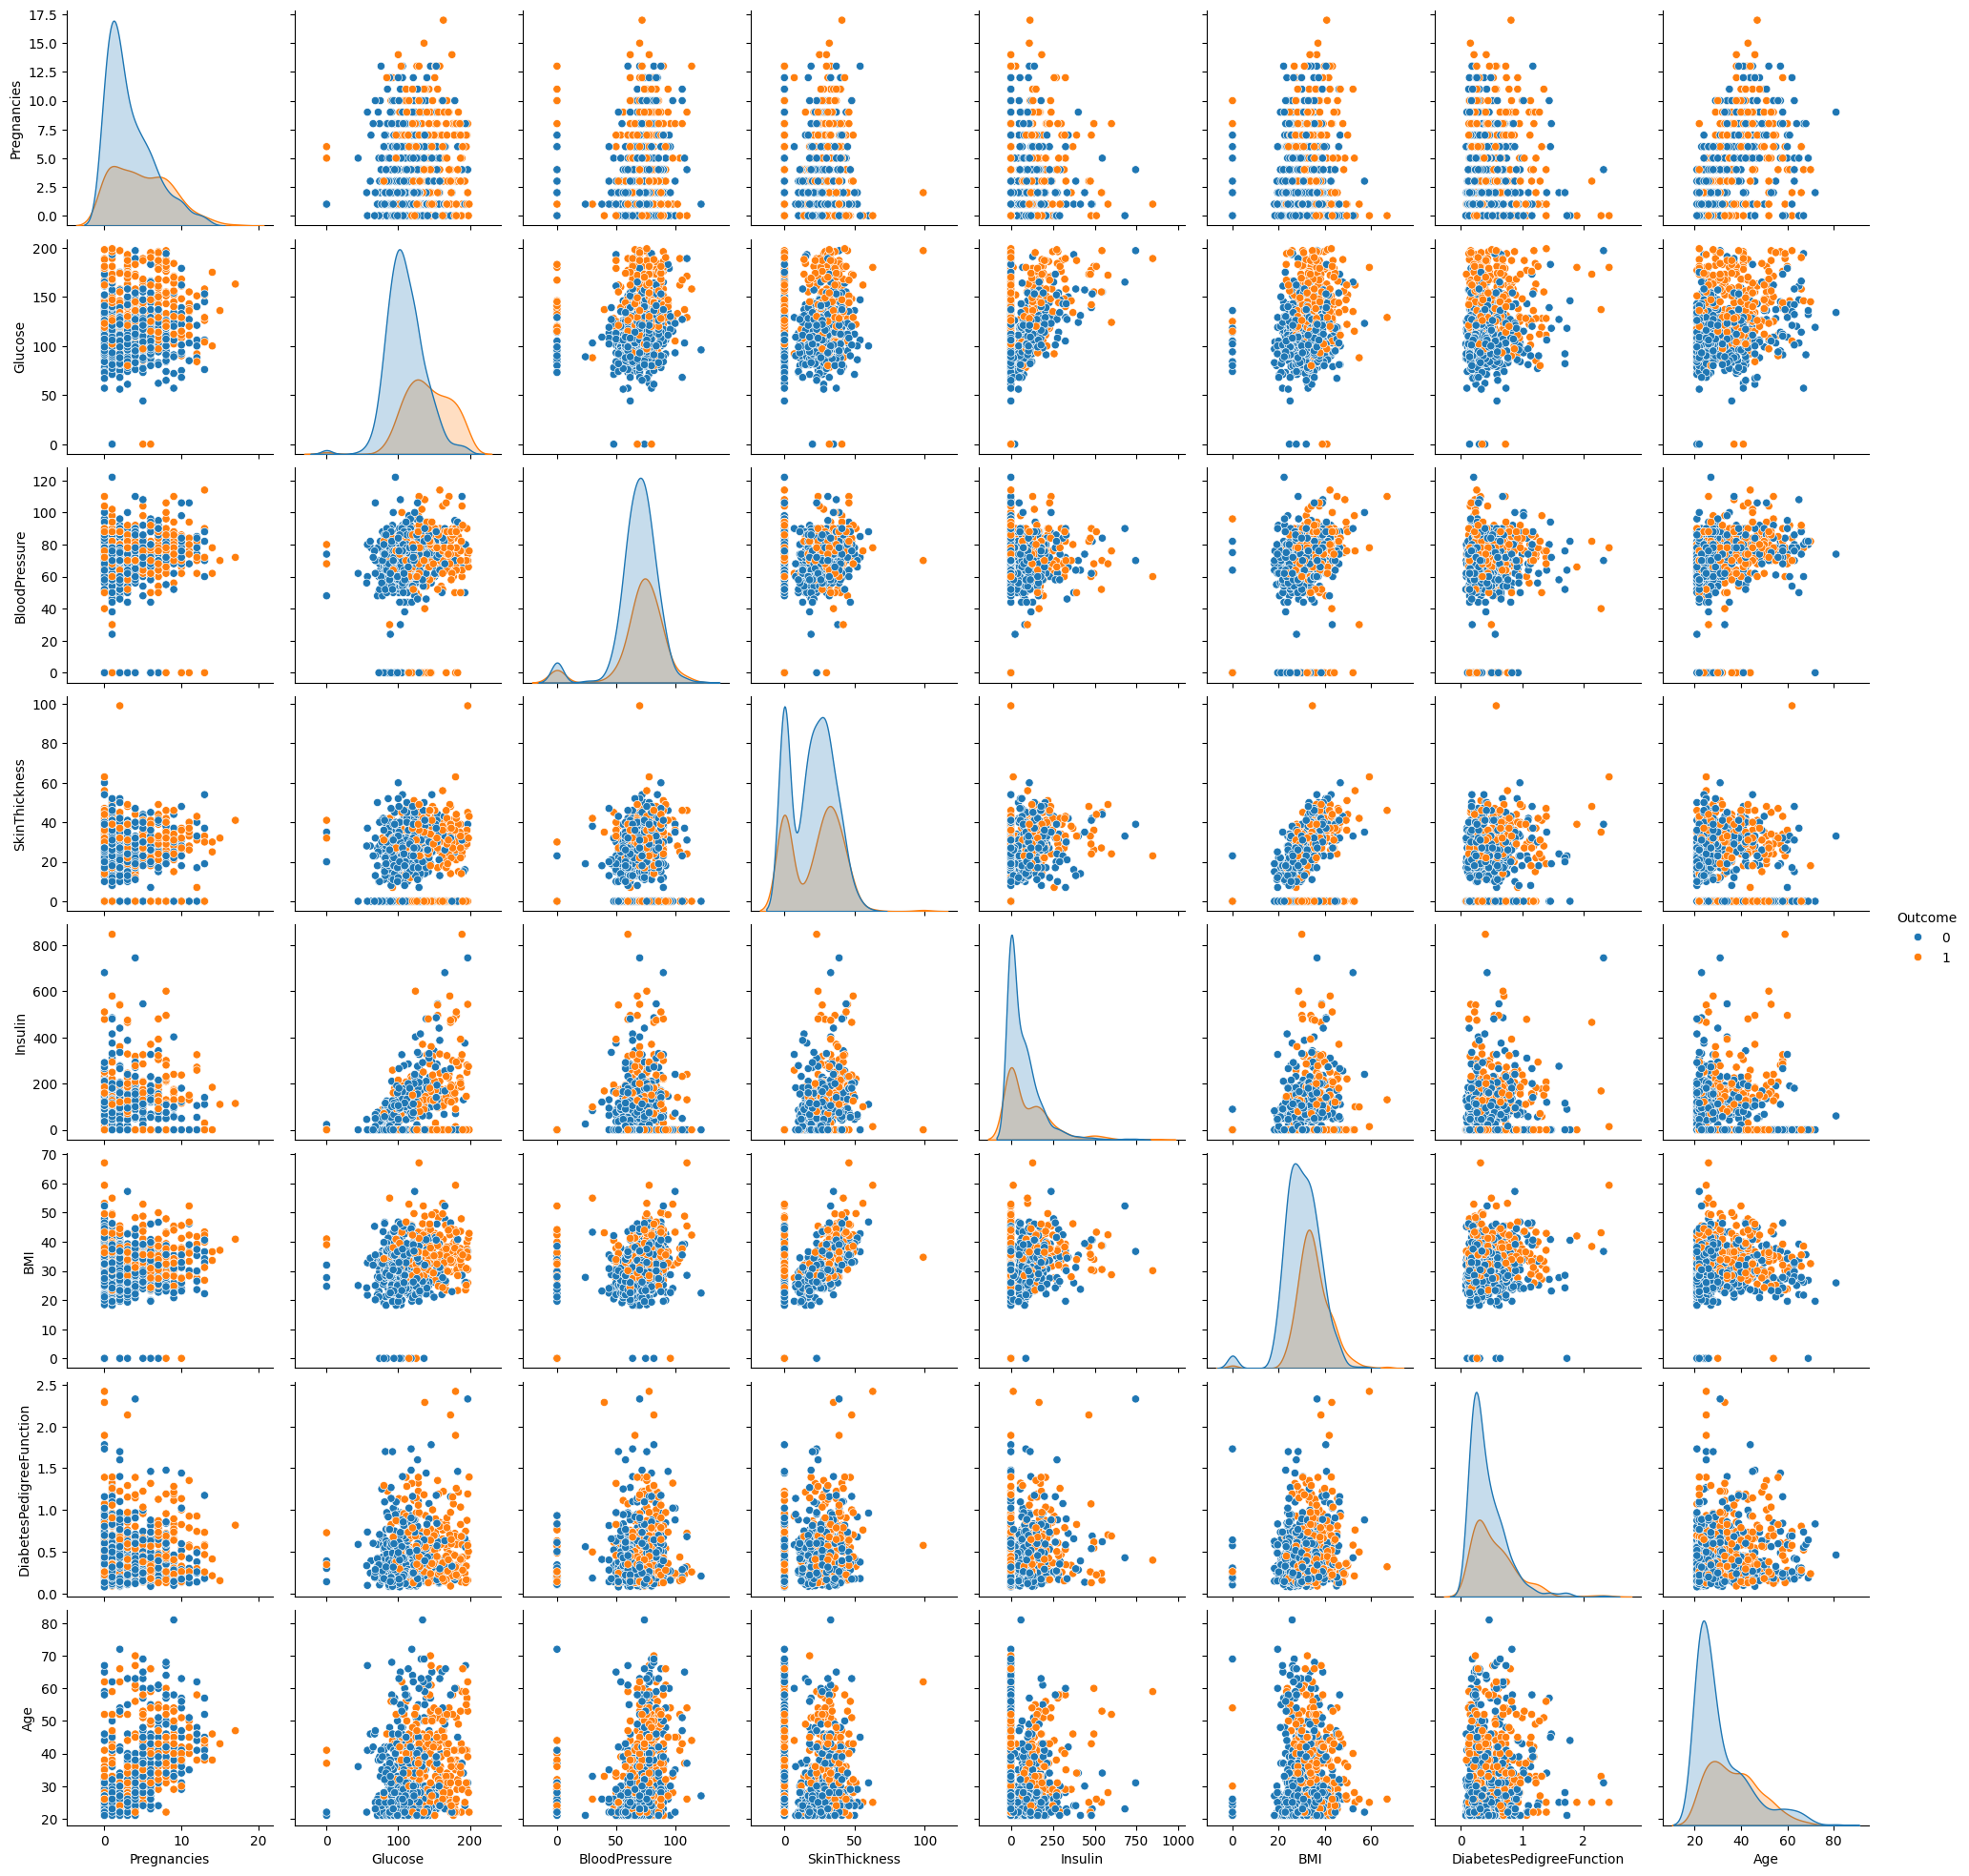

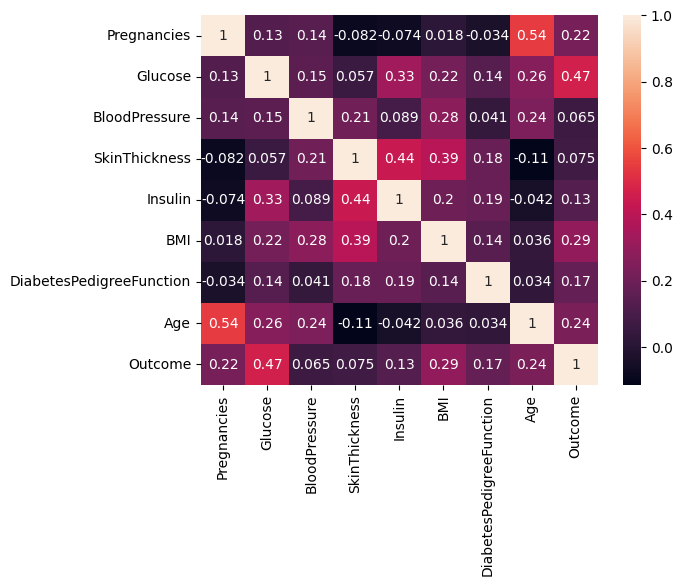

[[75 24]
 [15 40]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Mean squared error: 0.2532467532467532
Root mean squared error: 0.5032362797401965
R-squared: -0.10303030303030325


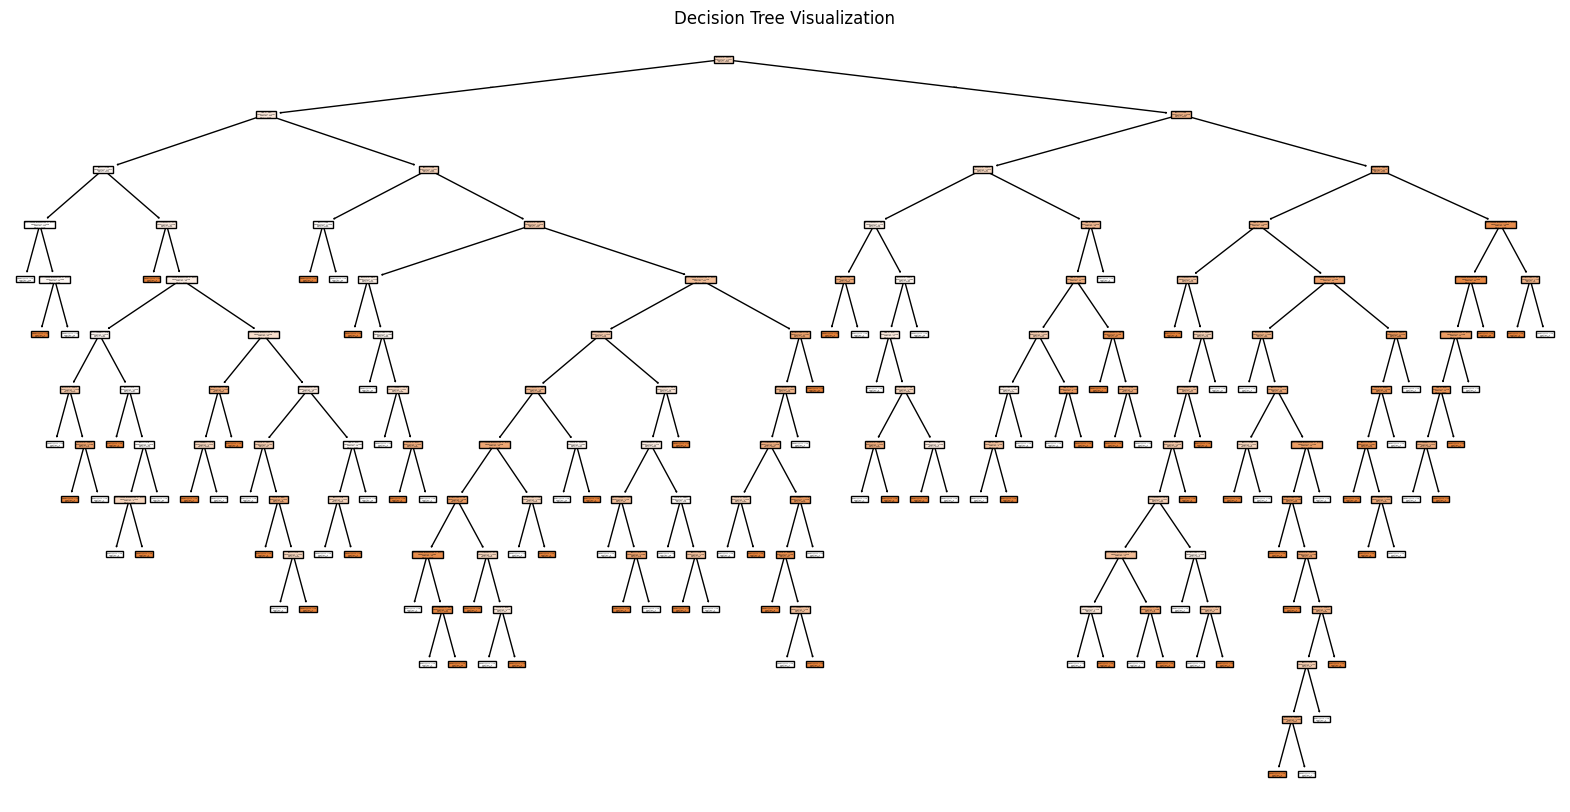

Cross-validation scores: [-0.39772727 -0.37737962 -0.23964166 -0.12099309 -0.14212766]
Mean cross-validation score: -0.2555738590013701
Best Parameters: {'criterion': 'poisson', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.20214382949012286
Optimized Mean Squared Error: 0.19395952571121694
Cross-validation scores: [ 0.11184747  0.07318658  0.05432188 -0.08304226  0.3346173 ]
Mean cross-validation score: 0.09818619427942157


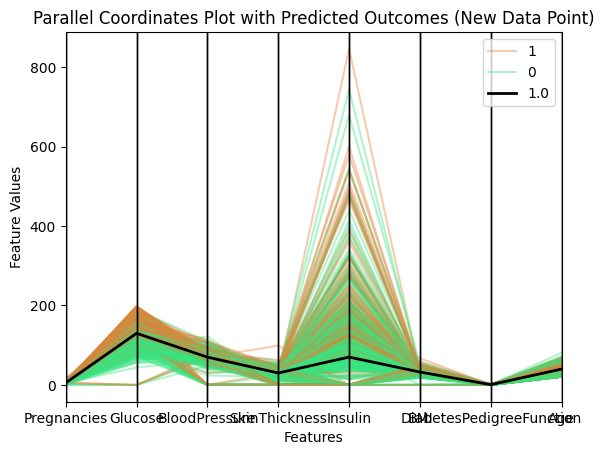

In [26]:


# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
import pickle

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
total_data = pd.read_csv(url)
total_data.head()

total_data.isnull().sum()

total_data.info()

 #Decision Tree

#Visualize the distribution of each feature
total_data.hist(bins=30, figsize=(15, 10))
plt.show()

sns.pairplot(total_data, hue="Outcome")
plt.show()


#check correlations with heatmap
corr = total_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

#Split the data into training and testing sets

X = total_data.drop('Outcome', axis=1)
y = total_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X



# Get the value counts of each outcome
total_data["Outcome"].value_counts()


#train the model and initialize the regressor
model = DecisionTreeRegressor(random_state= 42)

# Train the regressor
model.fit(X_train, y_train)
DecisionTreeRegressor(random_state=42)

#model prediction
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

  
#calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (evaluate the regressor)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared: {r2}")


# plot the tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Iinitialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {-grid_search.best_score_}')  # Negated because we used neg_mean_squared_error


# Initialize the model with the best parameters
best_regressor = DecisionTreeRegressor(**grid_search.best_params_)

# Train the model
best_regressor.fit(X_train, y_train)

# Make predictions
y_pred_best = best_regressor.predict(X_test)

# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Optimized Mean Squared Error: {mse_best}')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_regressor, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

#making predictions

new_data = pd.DataFrame({
    'Pregnancies': [5],
    'Glucose': [130],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [70],
    'BMI': [32.5],
    'DiabetesPedigreeFunction': [0.6],
    'Age': [40]
})

# Predict the outcome of the new data point
predicted_outcome = best_regressor.predict(new_data)
new_data["Prediction"] = predicted_outcome

new_data

# Plotting using parallel coordinates
pd.plotting.parallel_coordinates(total_data, "Outcome", color=("#E58139", "#39E581", "#8139E5"), alpha=0.4)
pd.plotting.parallel_coordinates(new_data, "Prediction", color="black", linewidth=2)
plt.title('Parallel Coordinates Plot with Predicted Outcomes (New Data Point)')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.legend(loc='upper right')
plt.show()



/home/vscode/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vscode/.local/

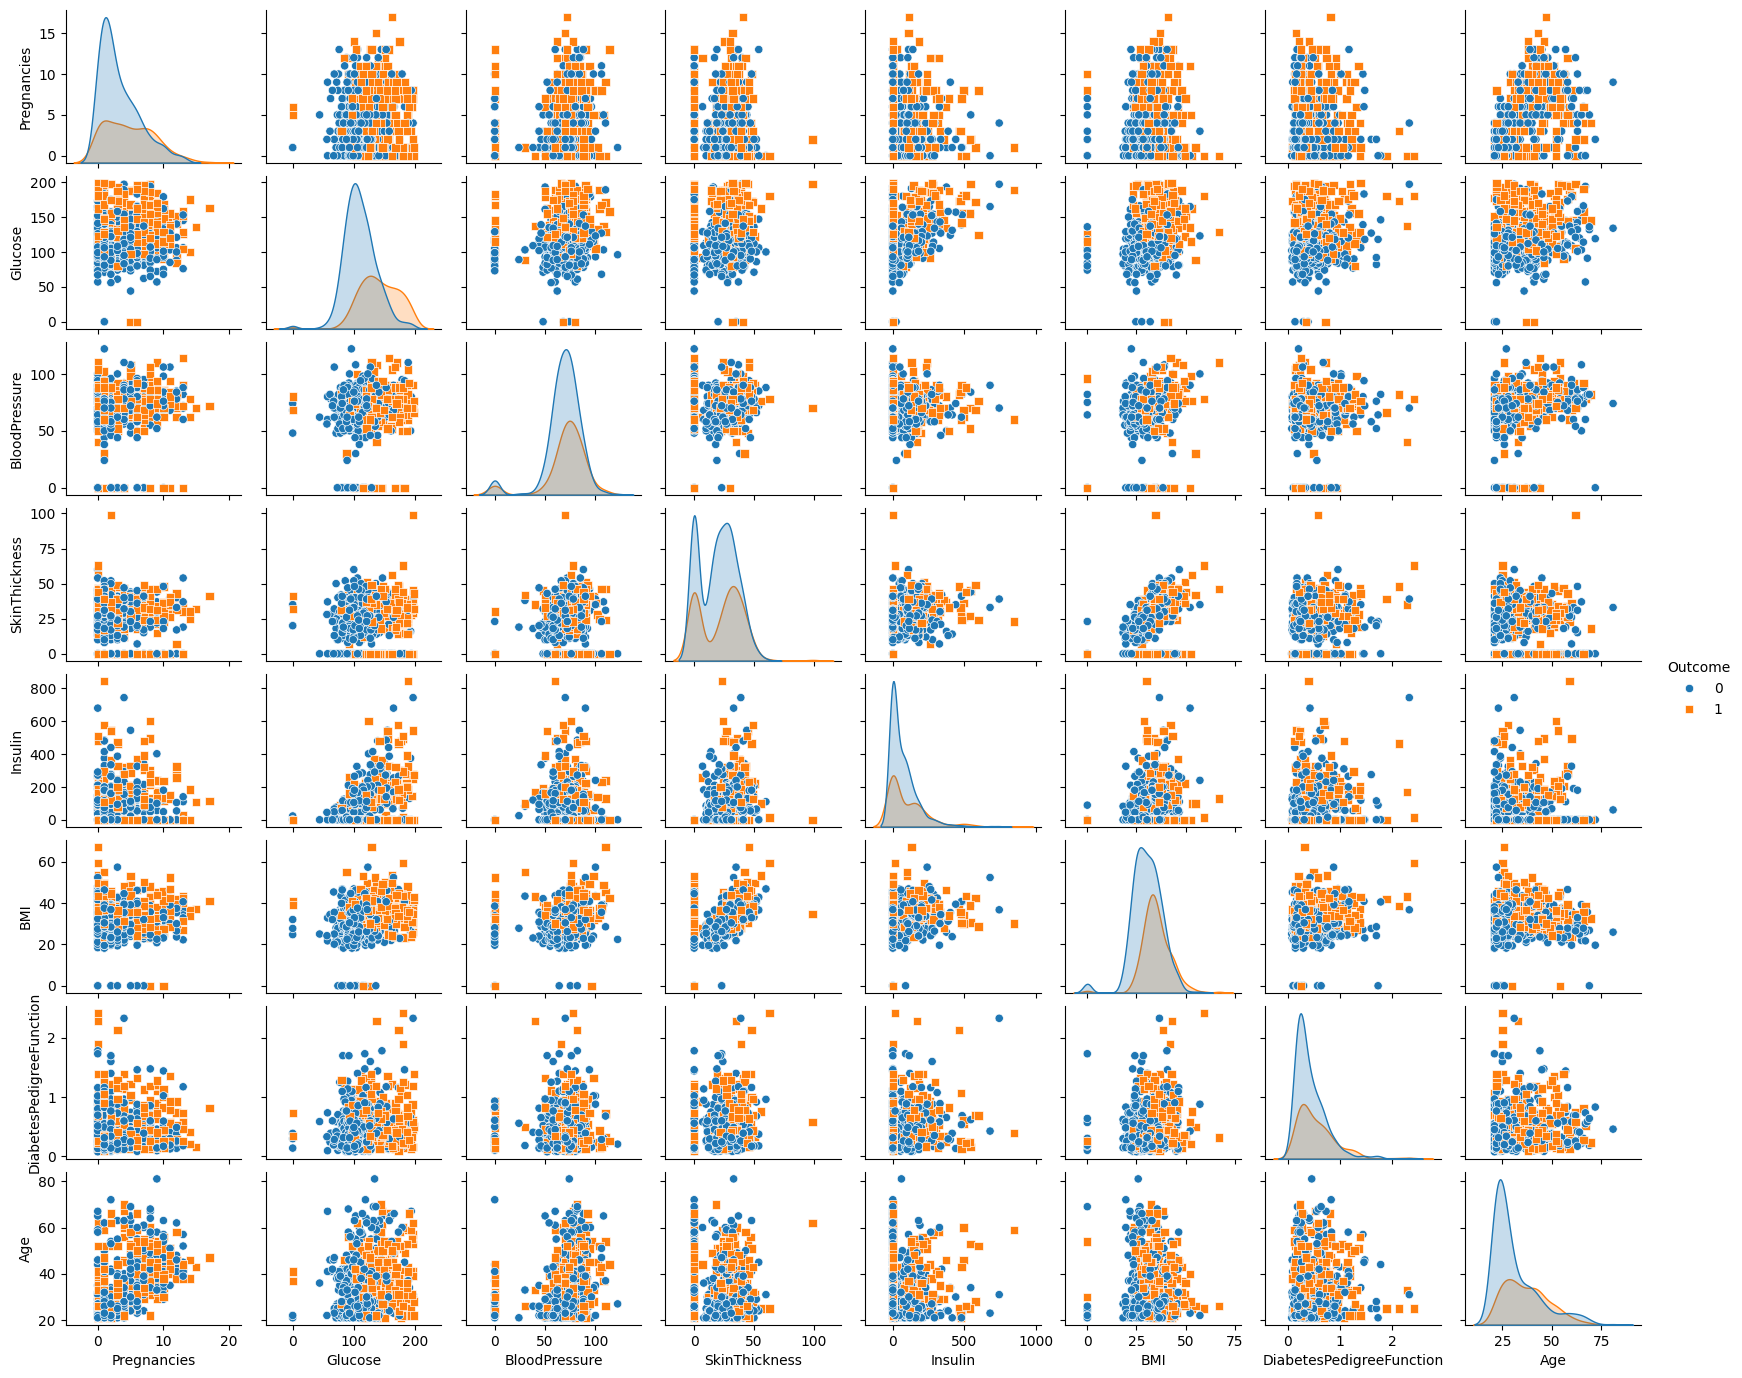

In [5]:
#Build a random forest

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

# Initialize the random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Visualize the dataset
sns.pairplot(total_data, hue='Outcome', markers=['o', 's', 'D'], height=1.75, aspect=1.2)
plt.show()

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)




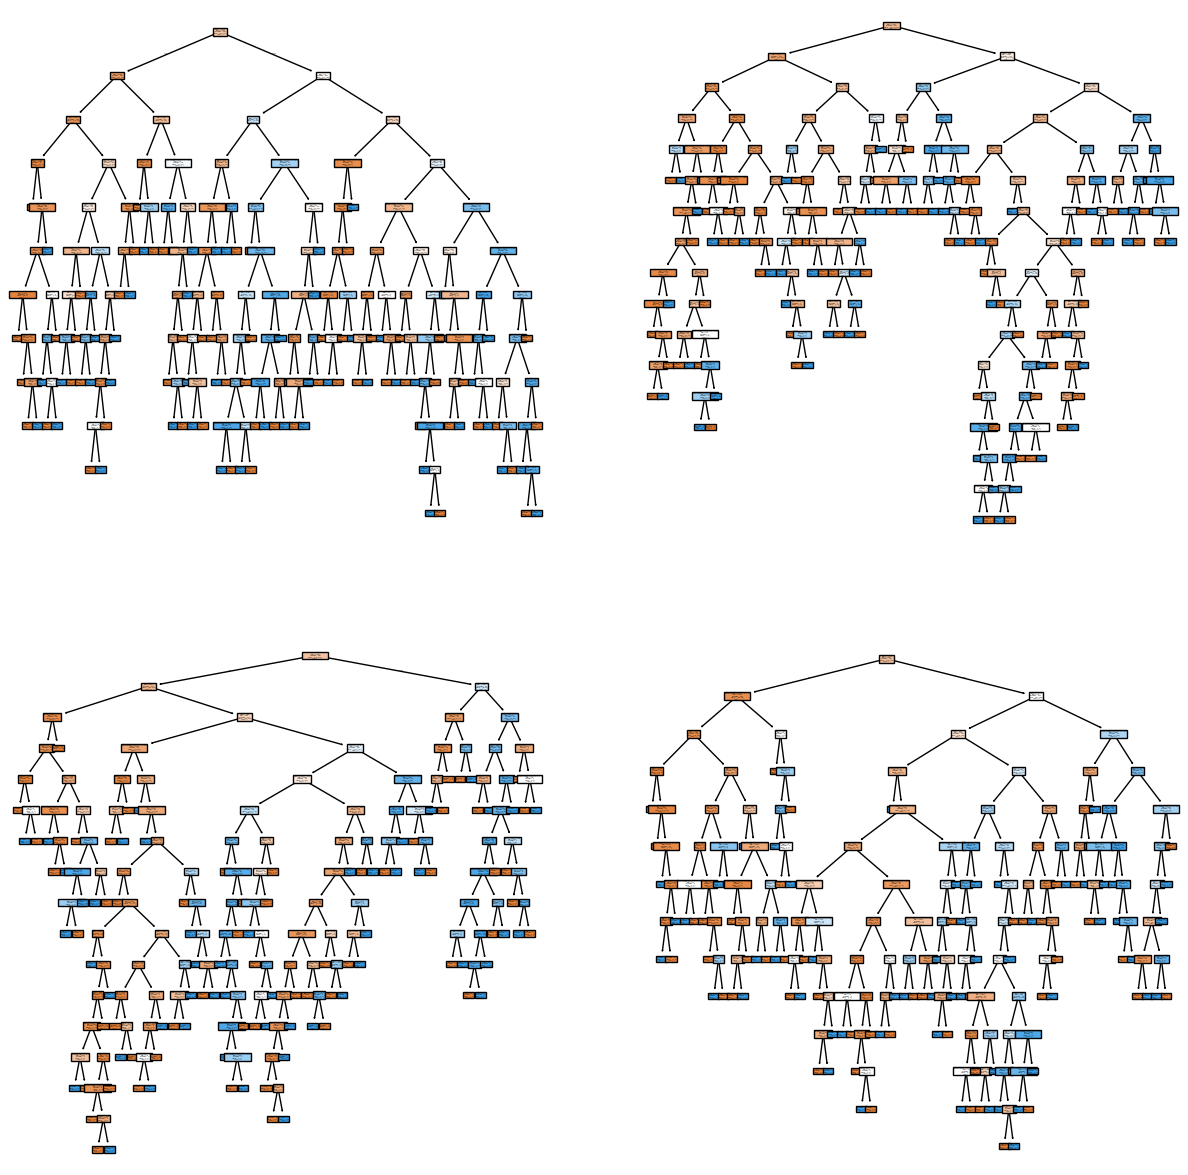

In [6]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

labels = list(map(str, total_data['Outcome'].unique()))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(rf_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(rf_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(rf_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(rf_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = labels, filled = True)

plt.show()

In [7]:
# Predict the labels for the test set
y_pred = rf_model.predict(X_test)

test_df = X_test.copy()
test_df["Outcome"] = y_test
test_df["Predictions"] = y_pred
test_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   

     DiabetesPedigreeFunction  Age  Outcome  Predictions  
668                     0.430   43        0            0  
324                     0.148   21        0            0  
624                     0.158   21        0            0  
690                     0.856   34        0            0  
473                     0.210   50        0            0

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(cr)

Accuracy: 0.7207792207792207

Confusion Matrix:
[[77 22]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



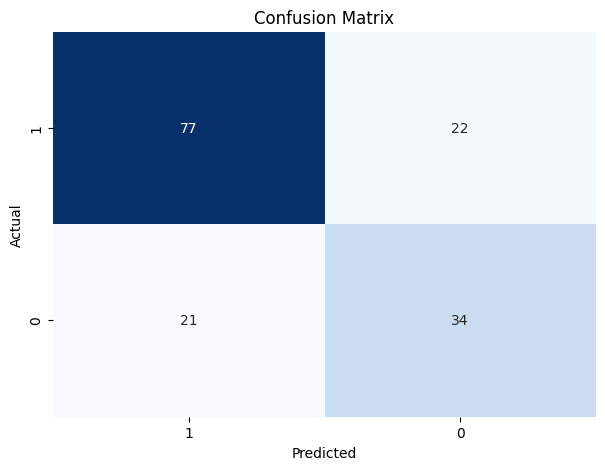

In [9]:
# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Initialize and train the Random Forest model while adjusting n_estimators
my_other_model = RandomForestClassifier(max_depth=3, random_state=42)
my_other_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

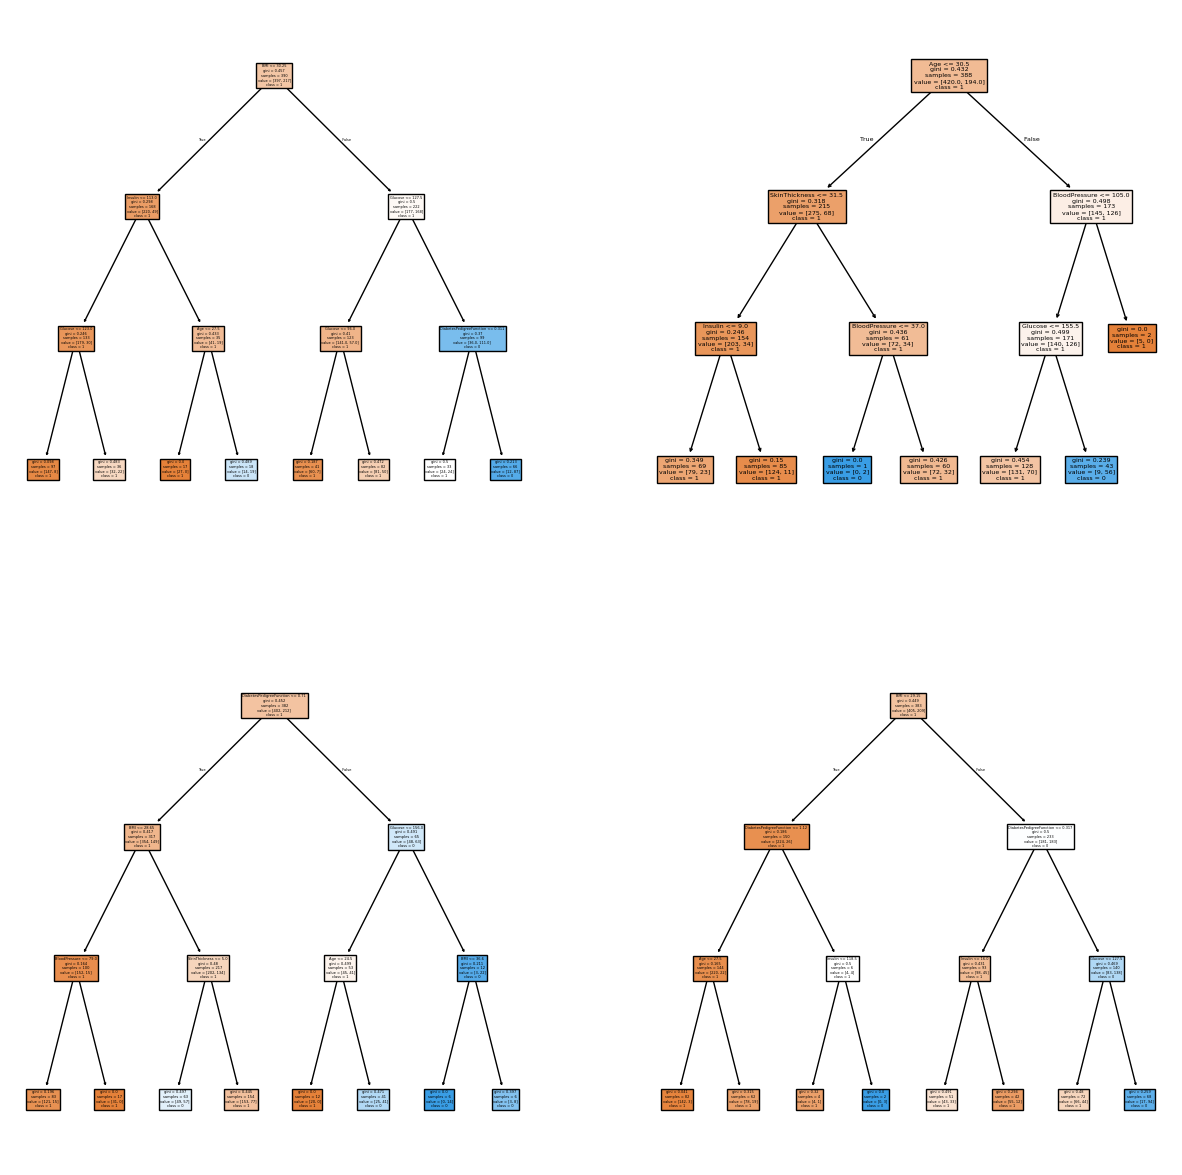

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(my_other_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(my_other_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(my_other_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(my_other_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = labels, filled = True)

plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [15]:
# Predict on the test set with the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7337662337662337


In [16]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.76422764 0.83739837 0.74796748 0.76422764 0.80327869]
Mean cross-validation score: 0.7834199653471945


In [27]:
import pandas as pd

# Check the columns in X_train
print(X_train.columns)

# Generate a new random data point with the same number of features as X_train
new_data_values = [3, 117, 110, 0, 0, 40.9, 0.310, 46]

# Ensure the number of values matches the number of columns in X_train
new_data_df = pd.DataFrame([new_data_values], columns=X_train.columns)

# Predict the outcome of the new data point
predicted_outcome = best_model.predict(new_data_df)
new_data_df["Prediction"] = predicted_outcome

new_data_df


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            3      117            110              0        0  40.9   

   DiabetesPedigreeFunction  Age  Prediction  
0                      0.31   46           0